# **Import dos módulos necessários.**

**train_test_split é um modulo da sklearn.model_selection que nos ajuda a dividir nossos dados em
treino e teste
LogisticRegression é um modulo do sklearn.linear_model que nos ajuda fazer a regressão logistica
CountVectorizer é um modulo do sklearn.linear_model que nos ajuda fazer a matriz do Bag of Words
%matplotlib inline faz com que os graficos sejam gerados direto em nosso notebook
WordCloud módulo para gerar a nuvem de palavras**

**Unicode é um modulo que nos ajuda a lidar com os acentos**

**O RSLP é um removedor de sufixo do NLTK ou seja ele faz o Stemmer das palvras**

**TfidfVectorizer é o modulo do Sklearn para fazer TF-IDF**

In [ ]:
import pandas as pd #Pandas é uma biblioteca equivalente ao Excel pro Windows
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns
from string import punctuation
import unidecode
from nltk import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

: 

**Nltk Natural Language Tool Kit é uma biblioteca do Python que nos ajuda na analise de sentimentos e tem compatibilidade com muitos idiomas diferentes**

**Abaixo baixamos todos os pacotes de linguagem disponiveis, porém é possivel baixar somente o idioma desejado**

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Aka_cjspz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Aka_cjspz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Aka_cjspz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Aka_cjspz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Aka_cjspz\AppData\Roaming\nltk_data.

True

# **Trabalhando dados do case IMDB**

**Lendo planilha de exemplo do curso**

In [3]:
resenha = pd.read_csv(r"C:\Users\Aka_cjspz\Documents\Alura\NLP\imdb-reviews-pt-br.csv") 

**Para utilizar a train_test_split passamos a coluna que queremos realizar analisar(text_pt) depois passamos a coluna que traz um status 
da em relação a esta coluna (sentiment) e por ultimo uma raiz randomica que serve para refletir a quantidade de vezes que nossos dados serão embaralhados
antes do split em treino e teste. Com isso geramos 4 variaveis a treino (texto da coluna que ficou em treino), a teste(texto da coluna que ficou em teste),
a classe_treino(status positivo ou negativo de cada linha do treino) e a classe_teste(status positivo ou negativo de cada linha do teste)**

In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                             random_state = 42)

**Aqui quando tentamos rodar a regressão logistica e printar a acuracia do nosso modelo somos informados que não é possivel realizar a regressão em valores
strings ou floats o que faz sentido**

In [5]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)
print(acuracia)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

**Antes de realizar qualquer classificação é ideal conhecermos o texto que queremos rodar nosso modelo e 
avaliar possiveis casos positivos ou negativos**

In [6]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [7]:
print("Positiva \n")
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

**Aqui é legal vermos se existe balanceamento entre as categorias, pois caso estiver desproporcional, temos
que utilizar técnicas de balanceamento, afim de evitarmos um modelo tendensioso**

In [8]:
print(resenha['sentiment'].value_counts()) 

neg    24765
pos    24694
Name: sentiment, dtype: int64


**Metodo replace do pandas bem util :) 
Aqui realizamos uma categorização nos dados aonde negativo = 0 e positivo = 1 que é o mais comum de se encontrar nas literaturas e cases**

In [9]:
classificacao = resenha['sentiment'].replace(["neg","pos"], [0,1]) 

**Apenas criando a coluna de classificacao 0 ou 1**

In [10]:
resenha['classificacao'] = classificacao 

In [11]:
print(resenha['classificacao'].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


**Chamando nosso vetorizados, pra fazer aquela tabela com os numeros de acordo com as palavras
O parametro max_features limita a quantidade de colunas(dimensões) da nossa matriz esparsa, o detalhe é este
parametro traz sempre por ordem de relevância no modelo, ou seja, abaixo ele separa as 50 palavras que mais
aparecem como colunas
Criando o Bag_of_word
Dividindo os dados em treino e teste,
rodando regressão logistica**


In [12]:
def classificar_texto(texto,coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    print(bag_of_words.shape)
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             texto[coluna_classificacao],
                                                             random_state = 42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino,classe_treino)
    return regressao_logistica.score(teste,classe_teste)

In [13]:
print(classificar_texto(resenha,"text_pt","classificacao"))

(49459, 50)
0.6583097452486858


**O WordCloud não consegue receber uma lista, ele recebe apenas uma variavel de texto, por isso, precisso fazer
uma compressão de todos as frases presentes na nossa coluna text_pt, para isso realizamos um metodo de compressão
de lista aonde cada variavel é unificada em uma unica string separa pelo caracter ' ' e salvo em uma variavel.
Depois geramos a Wordcloud passando WordCloud().generate(all_words)
width e height mexem na altura da WordCloud
max_font_size altera o tamanho da fonte das palavras dentro da Work Cloud
collocations ativa/desativa os bigramas que é quando duas palavras são tratadas como uma ex: "Um filme"** 

In [14]:
all_words = ' '.join([texto for texto in resenha['text_pt']])
nuvem_palavras = WordCloud(width=800, height=500, 
                          max_font_size=110, collocations=False).generate(all_words)

**Agora criamos a imagem da nossa nuvem de palavras utilizando o matplotlib e plotamos na tela
interpolation fazemos a interpolação dos pixeis da imagem
plt.axis("off") desativamos a label dos eixos**

<function matplotlib.pyplot.show(close=None, block=None)>

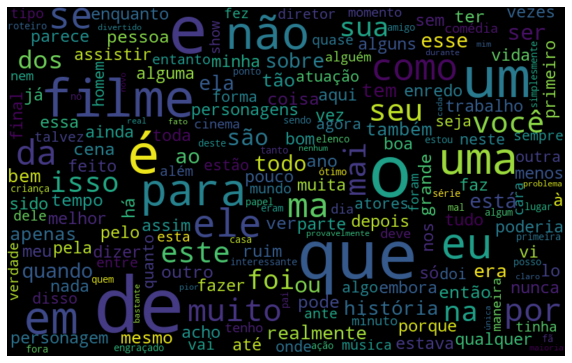

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show

**Agora vamos separar as palavras em duas Wordclouds uma para os sentimentos positivos e outra
para os sentimento negativos**

**A função abaixo recebe o dataframe, a coluna que queremos analisar e tambpem o termo pesquisado pelo pd.query**

In [16]:
def nuvem_palavras(texto, coluna_texto, termo):
    
    texto_query = texto.query("sentiment=='{}'".format(termo))
    all_words = ' '.join([texto for texto in texto_query[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, 
                              max_font_size=110, collocations=False).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show

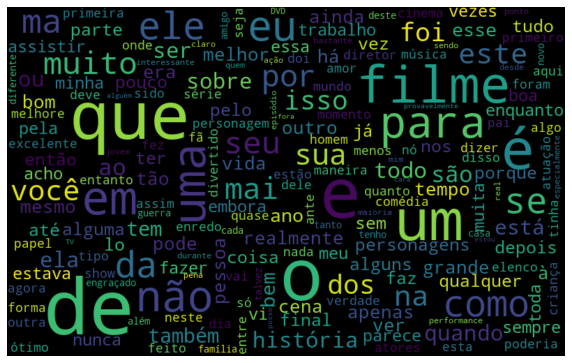

In [17]:
nuvem_palavras(resenha,"text_pt","pos")

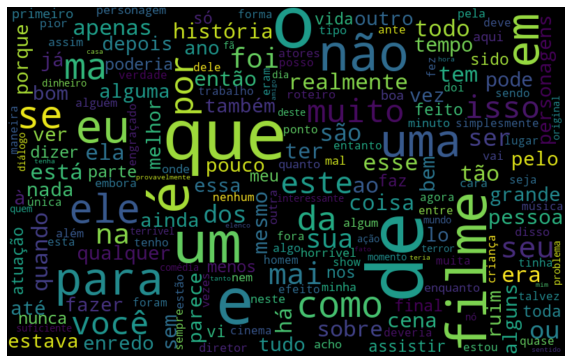

In [18]:
nuvem_palavras(resenha,"text_pt","neg")

**Agora Tokenizamos as palavras de cada frase pelo espaço em Branco e depois pltamos a frequencia**

In [19]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(all_words)
frequencia = nltk.FreqDist(token_frase)

In [20]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

**Agora colocamos as palavras e frequencias em um DF para melhorarmos a visualização, como é um "dict" passamos as colunas recebendo o key e o value do dicionario**

In [21]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequencia": list(frequencia.values())})

In [22]:
df_frequencia.head()

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


**Agora usamos o nlargest para separar as 10 palavras que possume maior frequencia, de cara já vemos que muitas palavram não agregam muito para nossa analise como "de, que, e, o..."**

In [23]:
df_frequencia.nlargest(columns="Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


**Plotando pareto com Seaborn**

In [24]:
def pareto(texto, coluna_texto, qtde):
    
    all_words = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(all_words)
    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequencia": list(frequencia.values())})
    
    df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=qtde)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia,x= "Palavra", y = "Frequencia", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

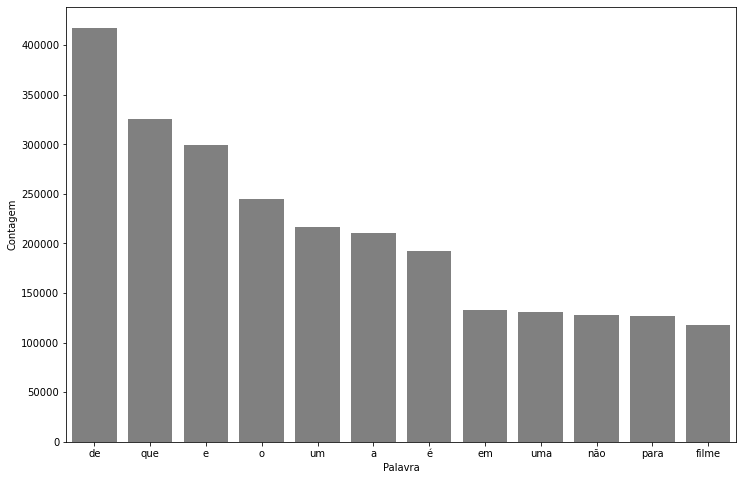

In [25]:
pareto(resenha, "text_pt", 12)

**Baixando as stopword da lingua portuguesa**

In [26]:
stop_words = nltk.corpus.stopwords.words("portuguese")

In [27]:
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

**Retirando as stop words das frases**

In [28]:
frase_processada = list()
for opiniao in resenha["text_pt"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in stop_words:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    

In [29]:
resenha['tratamento_1'] = frase_processada

**Refazendo nossa acurácia para ver que com essas tratativas obtivemos uma melhora**

In [30]:
classificar_texto(resenha,"tratamento_1","classificacao")

(49459, 50)


0.6607359482410028

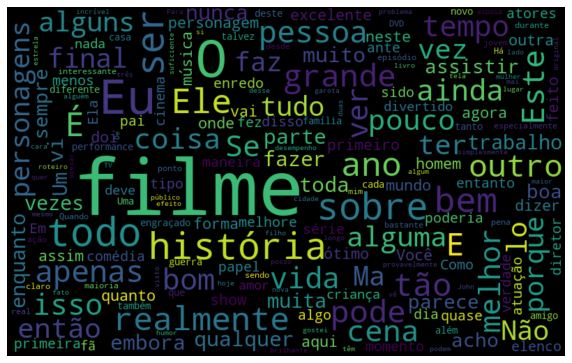

In [31]:
nuvem_palavras(resenha,"tratamento_1","pos")

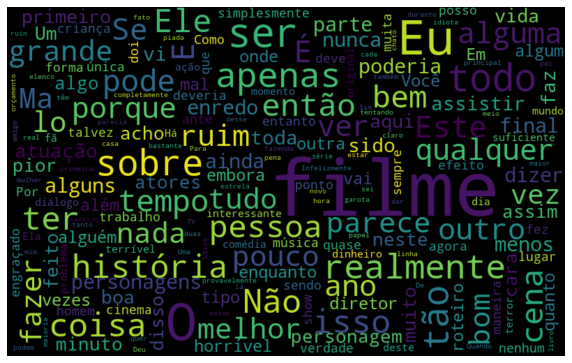

In [32]:
nuvem_palavras(resenha,"tratamento_1","neg")

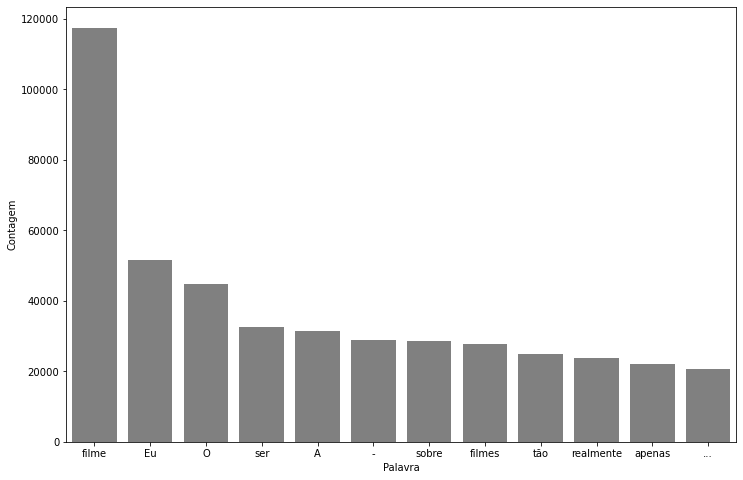

In [33]:
pareto(resenha,'tratamento_1',12)

**Primeiro criamos uma lista com toda a pontuação**

**Depois agragamos essa lista nas nossas outras stopwords**

**Por ultimo retiramos tokenizamos nossas frases pela pontuação e depois retiramos os sinais do nosso Vocabulário**

In [34]:
pontuacao = list()
for point in punctuation:
    pontuacao.append(point)

pontuacao_stopword = pontuacao + stop_words

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavra_texto:
        
        if palavra not in pontuacao_stopword:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [35]:
resenha

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


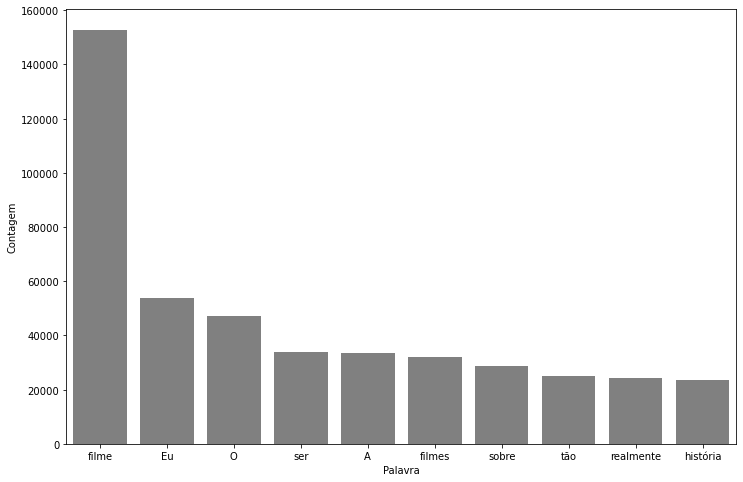

In [36]:
pareto(resenha, "tratamento_2", 10)

**Retirando os acentos das frases e stopwords e avaliando que vamos para 0.68 de acuracia**

In [37]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [38]:
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopword]

In [39]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavra_texto:
        
        if palavra not in pontuacao_stopword:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [40]:
acuracia_tratamento_3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento_3)

(49459, 50)
0.6810351799433886


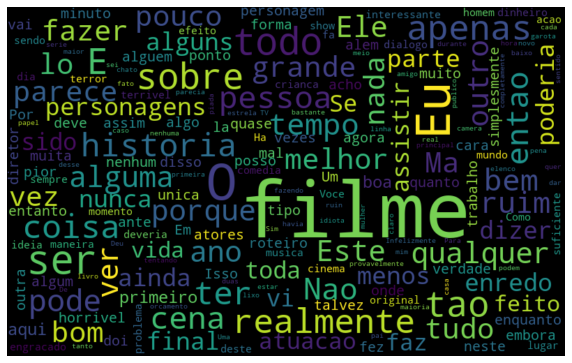

In [41]:
nuvem_palavras(resenha,"tratamento_3","neg")

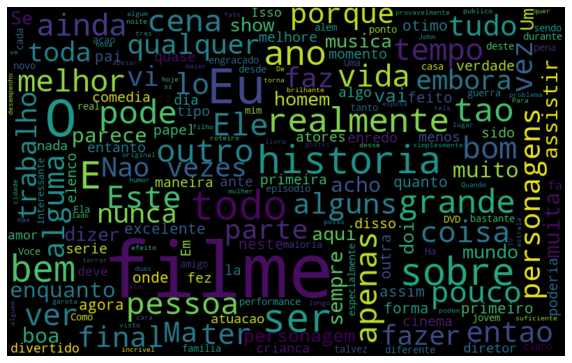

In [42]:
nuvem_palavras(resenha,"tratamento_3","pos")

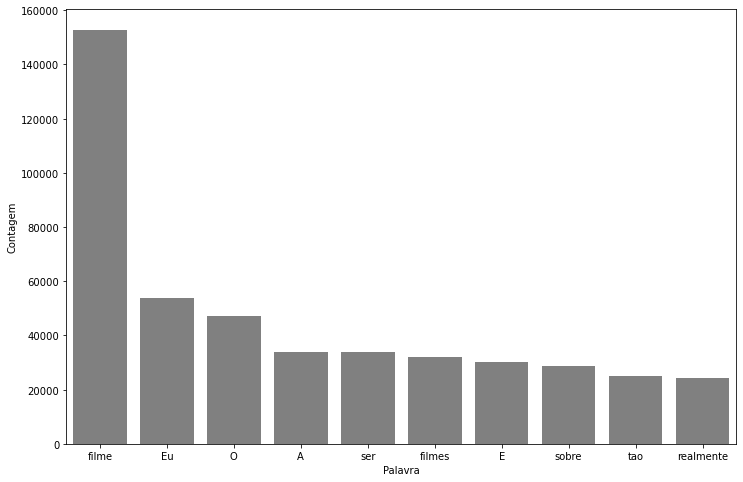

In [43]:
pareto(resenha, "tratamento_3", 10)

**Agora precisamos deixar todas as palavras em letra minuscula para retirar algumas stopwords**

In [44]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavra_texto:
        
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [45]:
print("Texto sem tratamento:\n\n{} \n\n Texto com Tratamento: \n\n {}".format(resenha["tratamento_3"][0],resenha["tratamento_4"][0]))

Texto sem tratamento:

Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora 

 Texto com Tratamento: 

 vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante 

In [46]:
acuracia_tratamento_4 = classificar_texto(resenha, "tratamento_4", "classificacao")

(49459, 50)


In [47]:
print(acuracia_tratamento_4)
print(acuracia_tratamento_3)

0.6879094217549535
0.6810351799433886


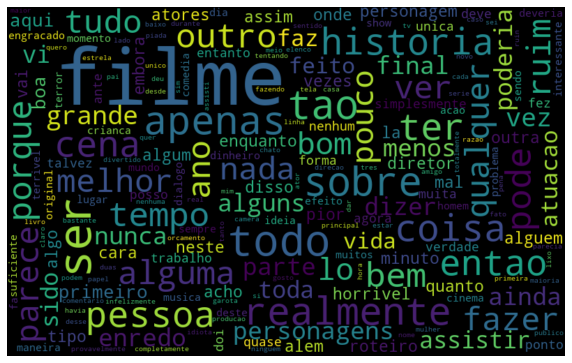

In [48]:
nuvem_palavras(resenha, "tratamento_4", "neg")

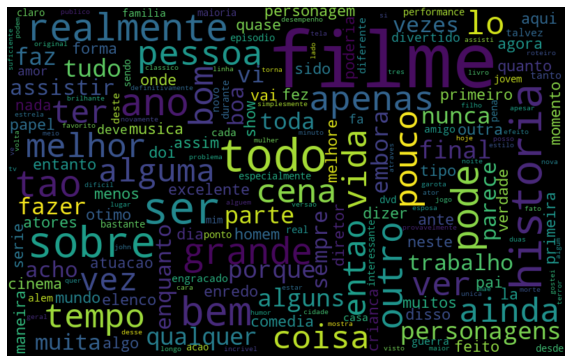

In [49]:
nuvem_palavras(resenha, "tratamento_4", "pos")

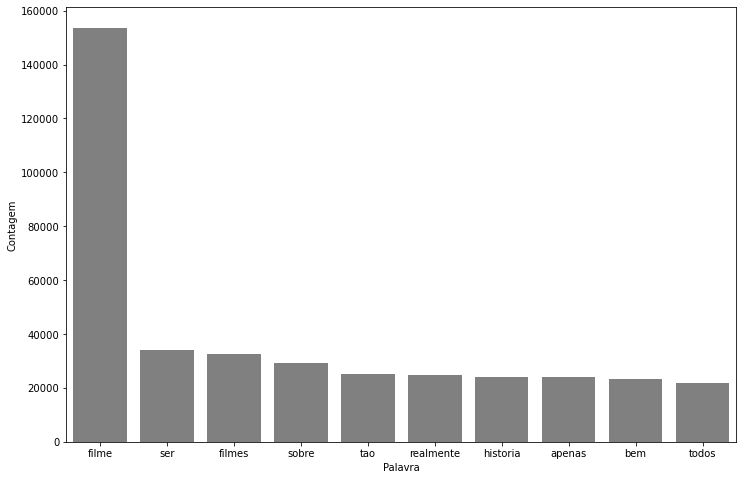

In [50]:
pareto(resenha, "tratamento_4", 10)

* Reduzir uma palavra ao seu radical é conhecido como Stemmer, por exemplo:

    **diari**o

    **diari**sta
    
    **diari**amente

* O Steammer reduziria esta palavra para **diari**


In [67]:
frase_processada = list()
stem = nltk.RSLPStemmer()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    
    
    for palavra in palavra_texto:
        
        if palavra not in stop_words_sem_acento:

            nova_frase.append(stem.stem(palavra))
    
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [68]:
acuracia_tratamento_5 = classificar_texto(resenha, "tratamento_5", "classificacao")

(49459, 50)


In [69]:
print(acuracia_tratamento_4)
print(acuracia_tratamento_5)

0.6879094217549535
0.6943792964011323


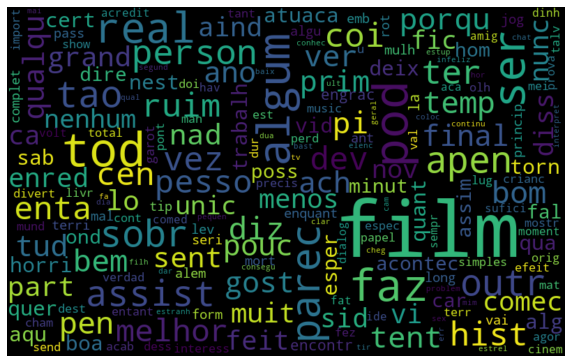

In [70]:
nuvem_palavras(resenha, "tratamento_5", "neg")

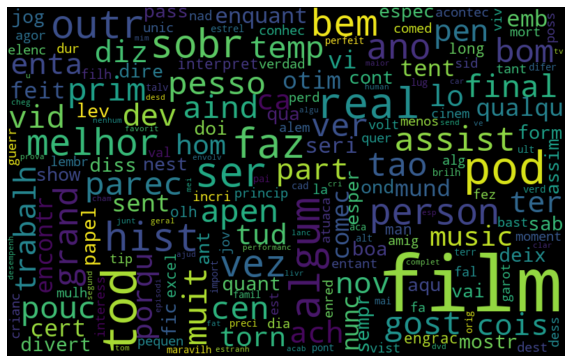

In [71]:
nuvem_palavras(resenha, "tratamento_5", "pos")

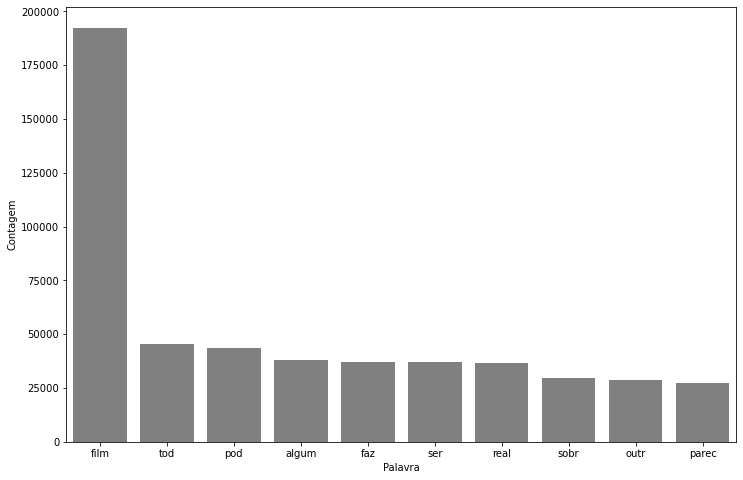

In [72]:
pareto(resenha, "tratamento_5", 10)

**Aplicando TF-IDF**

In [75]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tf_idf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tf_idf_bruto,
 resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tf_idf_bruto = regressao_logistica.score(teste,classe_teste)
print(acuracia_tf_idf_bruto)

0.6600889607763849


In [78]:
tf_idf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tf_idf_tratados,
 resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tf_idf_tratados = regressao_logistica.score(teste,classe_teste)
print(acuracia_tratamento_5)
print(acuracia_tf_idf_tratados)

0.6943792964011323
0.6988273352203801


**Aplicando Ngrams**

In [94]:
tfidf_bigram = TfidfVectorizer(lowercase=False, ngram_range= (1,2))
vetor_tfidf = tfidf_bigram.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste,classe_teste)

print(acuracia_tfidf_ngrams)

0.8858875859280226


In [83]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf = regressao_logistica.score(teste,classe_teste)

print(acuracia_tfidf)

0.884270117266478


In [95]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index= tfidf_bigram.get_feature_names()
)

pesos.nlargest(50,0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [96]:
pesos.nsmallest(50,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310


# **Explicação de conceitos**

**Criando frases para fazer o Bag of Words
Chamando nosso vetorizados, pra fazer aquela tabela com os numeros de acordo com as palavras
Criando o Bag_of_word**

In [51]:
texto = ["É Biscoito e não Bolacha","É Cookie e não Biscoito"]
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

**Obtendo os nomes das colunas, por padrão o CountVectorizer deixa as palavras todas minusculas,
por isso passamos o lowercase no CountVectorizer**

In [52]:
colunas =  vetorizar.get_feature_names()

**Criando matriz esparsa para representar o bag of words**

In [53]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=colunas)


In [54]:
matriz_esparsa

,Biscoito,Bolacha,Cookie,não
0,1,1,0,1
1,1,0,1,1


**Aqui calculamos com o "nltk.FreqDist" a frequencia das frases, porém o que queremos é a frequencia de palavras**

In [55]:
frase = ["Um filme ruim", "Um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'Um filme bom': 1})

**Para calcular a frequencia de palavras precisamos primeiro fazer a tokenização (passar cada palavra separadamente por algum delimitador como o "/")**

In [56]:
frase_2 = "Bem vindo ao mundo do PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase_2)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

**Temos que observar tambpem que ao tokenizar a pontuação pode influir nos resultados, exemplos:**
    
    1. Está legal.
    
    2. Está legal! 
    
**Ao fazer a tokenização deste corpus text teriamos o senguinte resultado:**

    ["Está", "legal.", "legal!" ]
        
**Apesar de ser a mesma palavra a tokenização as diferenciou, por isso abaixo vemos como tratar estes casos**

In [57]:
frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


**Lista de pontuações da biblioteca string do Python**

**from string import pontuation**

In [58]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
acentos = 'Ótimo péssimo é não tão'
#Unidecode retira os acentos do nosso corpus texto
testes = unidecode.unidecode(acentos)
print(testes)

Otimo pessimo e nao tao


**Aplicando Stemmer**

In [66]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('correria')

'corr'

**Realizando um exemplo de TF-IDF**

In [74]:
frases = ['Assiti um filme ótimo','Assisti um filme péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteres = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteres.todense(),
    columns=tfidf.get_feature_names()
)

,Assisti,Assiti,filme,péssimo,um,ótimo
0,0.000000,0.576152,0.409937,0.000000,0.409937,0.576152
1,0.576152,0.000000,0.409937,0.576152,0.409937,0.000000


**Aplicando ngrams**

In [81]:
frases = "Assiti um filme ótimo."
frase_separada = token_espaco.tokenize(frases)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assiti', 'um'), ('um', 'filme'), ('filme', 'ótimo.')]